# Explore Data

In [9]:
%load_ext autoreload
%autoreload 2

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load Data

In [1]:
import pandas as pd

df_orig = pd.read_csv("../data/rottentomatoes-400k.csv", index_col=[0])

# Reviewer 컬럼 삭제 
df_orig.drop(columns='Reviewer', inplace=True)

In [3]:
df = df_orig.copy()
df

,Movie,Publish,Review,Date,Score
0,HOTEL TRANSYLVANIA: TRANSFORMANIA,City AM,I guess its always been hard for me to see the...,03/03/2022,40.0
1,HOTEL TRANSYLVANIA: TRANSFORMANIA,AniMat's Review (YouTube),Hotel Transylvania: Transformania is a present...,15/02/2022,30.0
2,HOTEL TRANSYLVANIA: TRANSFORMANIA,Newsday,The conceit still works well enough to mostly ...,29/01/2022,75.0
3,HOTEL TRANSYLVANIA: TRANSFORMANIA,jackiekcooper.com,"No Adam Sandler this time out, but the animate...",28/01/2022,60.0
4,HOTEL TRANSYLVANIA: TRANSFORMANIA,The Playlist,It's not likely we'll see another one of these...,28/01/2022,74.0
...,...,...,...,...,...
421488,HITLER: THE LAST TEN DAYS,Chicago Sun-Times,"There's no tragedy in this movie, no sense of ...",13/06/2020,25.0
421489,HITLER: THE LAST TEN DAYS,TV Guide,Yet another failed attempt to make the Fuhrer ...,23/02/2012,40.0
421490,THE ONE AND ONLY,Chicago Tribune,"""The One and Only"" is really two stories at od...",31/08/2021,50.0
421491,THE ONE AND ONLY,San Francisco Examiner,"[A] silly, old-fashioned comedy directed with ...",31/08/2021,75.0


In [12]:
# Date 컬럼을 datetime 포맷으로 변환
df['Date']= pd.to_datetime(df['Date'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417058 entries, 0 to 421492
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   Movie    417058 non-null  object        
 1   Publish  417058 non-null  object        
 2   Review   417058 non-null  object        
 3   Date     417058 non-null  datetime64[ns]
 4   Score    417058 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 19.1+ MB


In [4]:
df.describe(include='all', datetime_is_numeric=True)

,Movie,Publish,Review,Date,Score
count,417058,417058,417058,417058,417058.000000
unique,9366,1615,416395,6259,NaN
top,JOKER,Slant Magazine,full review at Movies for the Masses,01/11/2018,NaN
freq,380,4977,159,657,NaN
mean,NaN,NaN,NaN,NaN,65.330320
std,NaN,NaN,NaN,NaN,19.691417
min,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,50.000000
50%,NaN,NaN,NaN,NaN,69.000000
75%,NaN,NaN,NaN,NaN,80.000000


## Movies with Most Reviews

<AxesSubplot:title={'center':'Number of articles per category'}, xlabel='Category', ylabel='Articles Count'>

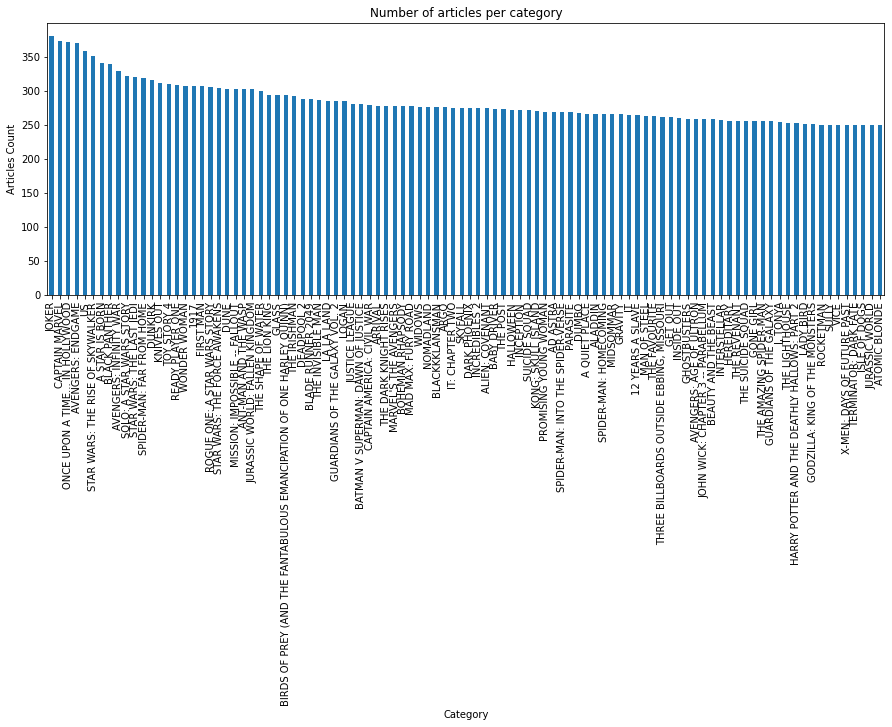

In [5]:
#create bar plot to visualize frequency of each team
df['Movie'].value_counts()[0:100].plot(kind='bar', 
                                      xlabel='Category', 
                                      ylabel='Articles Count', 
                                      rot=90, 
                                      title='Number of articles per category',
                                      figsize=(15,5))

## About Reviews
Some `Review` contain not meaningful text, e.g. 'click for full review', etc.

In [15]:
df[df['Review']=='click for full review']

,Movie,Publish,Review,Date,Score
54033,THE EDGE OF LOVE,Movies for the Masses,click for full review,2009-05-14,50.0
369146,LET THE RIGHT ONE IN,Movies for the Masses,click for full review,2009-05-14,100.0
375887,BROKEN EMBRACES,Movies for the Masses,click for full review,2009-10-13,40.0
377804,ANTICHRIST,Movies for the Masses,click for full review,2009-10-13,20.0
381981,HALLOWEEN II,Movies for the Masses,click for full review,2009-10-13,80.0
384154,LION'S DEN,Movies for the Masses,click for full review,2009-05-14,50.0
384495,G-FORCE,Movies for the Masses,click for full review,2009-10-13,20.0
385951,FUNNY PEOPLE,Movies for the Masses,click for full review,2009-10-13,60.0
395173,LET'S TALK ABOUT THE RAIN,Movies for the Masses,click for full review,2009-05-14,60.0
395190,KNOWING,Movies for the Masses,click for full review,2009-05-14,40.0


In [16]:
df['Review'].value_counts()[0:10]

full review at Movies for the Masses    159
click to read full review                14
click for full review                    13
podcast review                           12
Click for full review                     9
One of the ten best films of 2012.        9
click to read the full review             9
What a disappointment.                    7
A masterpiece.                            6
A missed opportunity.                     6
Name: Review, dtype: int64

## Text Length 

In [17]:
# Word_Count 컬럼 추가. 문자열을 공백으로 분할하고 분할된 단어들의 수를 계산
df["Word_Count"] = df["Review"].apply(lambda n: len(n.split()))
df

,Movie,Publish,Review,Date,Score,Word_Count
0,HOTEL TRANSYLVANIA: TRANSFORMANIA,City AM,I guess its always been hard for me to see the...,2022-03-03,40.0,42
1,HOTEL TRANSYLVANIA: TRANSFORMANIA,AniMat's Review (YouTube),Hotel Transylvania: Transformania is a present...,2022-02-15,30.0,27
2,HOTEL TRANSYLVANIA: TRANSFORMANIA,Newsday,The conceit still works well enough to mostly ...,2022-01-29,75.0,15
3,HOTEL TRANSYLVANIA: TRANSFORMANIA,jackiekcooper.com,"No Adam Sandler this time out, but the animate...",2022-01-28,60.0,13
4,HOTEL TRANSYLVANIA: TRANSFORMANIA,The Playlist,It's not likely we'll see another one of these...,2022-01-28,74.0,23
...,...,...,...,...,...,...
421488,HITLER: THE LAST TEN DAYS,Chicago Sun-Times,"There's no tragedy in this movie, no sense of ...",2020-06-13,25.0,17
421489,HITLER: THE LAST TEN DAYS,TV Guide,Yet another failed attempt to make the Fuhrer ...,2012-02-23,40.0,13
421490,THE ONE AND ONLY,Chicago Tribune,"""The One and Only"" is really two stories at od...",2021-08-31,50.0,13
421491,THE ONE AND ONLY,San Francisco Examiner,"[A] silly, old-fashioned comedy directed with ...",2021-08-31,75.0,11


### plot `Word_Count` per `Review`

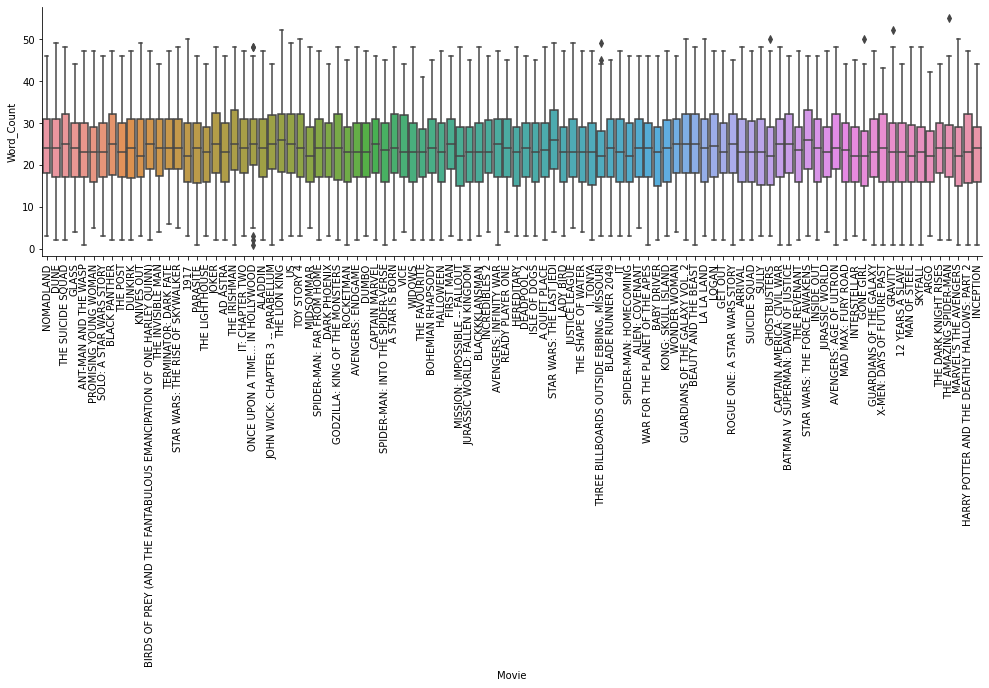

In [20]:
from matplotlib import pyplot as plt
import seaborn as sns

# plot word counts for reviews of first 100 movies
df_plot = df[df['Movie'].isin(df['Movie'].value_counts()[0:100].index.to_list())]
_ = sns.catplot(data=df_plot, x="Movie", y="Word_Count", kind="box", height=4, aspect=4)
_ = plt.xticks(rotation=90)

## Subset of data

In [22]:
df['Movie'].value_counts()[0:20].index.to_list()

['JOKER',
 'CAPTAIN MARVEL',
 'ONCE UPON A TIME... IN HOLLYWOOD',
 'AVENGERS: ENDGAME',
 'US',
 'STAR WARS: THE RISE OF SKYWALKER',
 'A STAR IS BORN',
 'BLACK PANTHER',
 'AVENGERS: INFINITY WAR',
 'SOLO: A STAR WARS STORY',
 'STAR WARS: THE LAST JEDI',
 'SPIDER-MAN: FAR FROM HOME',
 'DUNKIRK',
 'KNIVES OUT',
 'TOY STORY 4',
 'READY PLAYER ONE',
 'WONDER WOMAN',
 'FIRST MAN',
 '1917',
 'ROGUE ONE: A STAR WARS STORY']

In [21]:
movie_list = df['Movie'].value_counts()[0:20].index.to_list()

df_sub = df[df['Movie'].isin(movie_list)]
df_sub

,Movie,Publish,Review,Date,Score,Word_Count
8457,SOLO: A STAR WARS STORY,Stuff.co.nz,The formula is strong with this one.,2018-05-24,70.0,7
9207,BLACK PANTHER,Gone With The Twins,Just about the same as every other Marvel title.,2020-05-12,50.0,9
11458,DUNKIRK,Screen Zealots,This is one heck of a stunning war picture.,2018-12-20,80.0,9
15446,KNIVES OUT,Student Edge,Don't fear: No spoilers here. All you need to ...,2019-11-26,80.0,17
18961,KNIVES OUT,Deep Focus Review,"Sharp and funny, Knives Out exceeds expectatio...",2022-02-23,100.0,29
...,...,...,...,...,...,...
137428,ROGUE ONE: A STAR WARS STORY,Movie Nation,This is more like it...the 'Star Wars' movie J...,2016-12-13,75.0,13
137429,ROGUE ONE: A STAR WARS STORY,Newsday,"This ""Star Wars"" spinoff doesn't spin very far...",2016-12-13,75.0,19
137430,ROGUE ONE: A STAR WARS STORY,Metro,Boasts thin characters played by great actors ...,2016-12-13,40.0,37
137431,ROGUE ONE: A STAR WARS STORY,Den of Geek,Rogue One builds to one of the best third acts...,2016-12-13,80.0,14


## Save data

In [23]:
df_sub.to_csv("../data/rottentomatoes-20movies-wordcount.csv", sep='\t', index=False)

In [24]:
# load data
pd.read_csv("../data/rottentomatoes-20movies-wordcount.csv", sep='\t')

,Movie,Publish,Review,Date,Score,Word_Count
0,SOLO: A STAR WARS STORY,Stuff.co.nz,The formula is strong with this one.,2018-05-24,70.0,7
1,BLACK PANTHER,Gone With The Twins,Just about the same as every other Marvel title.,2020-05-12,50.0,9
2,DUNKIRK,Screen Zealots,This is one heck of a stunning war picture.,2018-12-20,80.0,9
3,KNIVES OUT,Student Edge,Don't fear: No spoilers here. All you need to ...,2019-11-26,80.0,17
4,KNIVES OUT,Deep Focus Review,"Sharp and funny, Knives Out exceeds expectatio...",2022-02-23,100.0,29
...,...,...,...,...,...,...
6635,ROGUE ONE: A STAR WARS STORY,Movie Nation,This is more like it...the 'Star Wars' movie J...,2016-12-13,75.0,13
6636,ROGUE ONE: A STAR WARS STORY,Newsday,"This ""Star Wars"" spinoff doesn't spin very far...",2016-12-13,75.0,19
6637,ROGUE ONE: A STAR WARS STORY,Metro,Boasts thin characters played by great actors ...,2016-12-13,40.0,37
6638,ROGUE ONE: A STAR WARS STORY,Den of Geek,Rogue One builds to one of the best third acts...,2016-12-13,80.0,14
